In [2]:
import pandas as pd
import os

# Define the directory path where the files are located
directory = 'data/5-labeled-sentiment/dataMaud/'

# Initialize an empty dictionary to store dataframes for each year
dataframes_per_year = {}

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Extract year and fuel type from the filename
        year, fuel_type = filename.split('_')[0], filename.split('_')[1].split('.')[0]
        
        # Load the CSV file into a dataframe
        df = pd.read_csv(os.path.join(directory, filename))
        
        # Add a new column for fuel type
        df['Fuel_Type'] = fuel_type
        
        # Add the dataframe to the dictionary using year as key
        if year not in dataframes_per_year:
            dataframes_per_year[year] = df
        else:
            # If dataframe for the year already exists, merge them
            dataframes_per_year[year] = pd.concat([dataframes_per_year[year], df])


# Twolabelerdata

In [3]:
import os
import pandas as pd

directory = r'data\5-labeled-sentiment\labeled-full\processed\cleaned'
# Step 1: Read all the dataframes from the directory
dfs = {}
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        filepath = os.path.join(directory, filename)
        person, year, fueltype, _ = filename.split('_')
        key = (person, year, fueltype)
        df = pd.read_csv(filepath)
        dfs.setdefault(key, []).append(df)

In [13]:
coal70edo = dfs['edo', '1970s', 'coal'][0]
coal70marin = dfs['marin', '1970s', 'coal'][0]

unique_edo_articles = coal70edo['index_article'].unique()
unique_marin_articles = coal70marin['index_article'].unique()

# Identify articles in edo but not in marin
articles_in_edo_not_marin = set(unique_edo_articles) - set(unique_marin_articles)

In [19]:
# Step 2: Merge the dataframes based on the file name structure
merged_dfs = {}
for key, dfs_list in dfs.items():
    merged_df = pd.concat(dfs_list, ignore_index=True)

    # Step 3: Apply the merging rules
    merged_df['Labels'] = merged_df.groupby('Index_article')['Labels'].transform(lambda x: max(x))

    # Step 4: Discard rows where the original labelers had diverging opinions
    merged_df = merged_df[~merged_df['Labels'].duplicated(keep=False)]

    merged_dfs[key] = merged_df

{('1970s',
  'edo'):      Unnamed: 0  labels                                               text  \
 0             0       2  Ook de meeste andere woordvoerders menen dat L...   
 1             1       1  De eerste lading van circa 40.000 ton Amerikaa...   
 2             2       2  ROTTERDAM, zaterdag De Shell heeft Rotterdam u...   
 3             3       2  Minister Lubbers deelde mee, dat het aandeel v...   
 4             4       1  Een woordvoerder van Hoogovens vertelde gister...   
 ..          ...     ...                                                ...   
 468         468       2  EEN HISTORISCH gebeuren voor de Antillen is va...   
 469         469       1  De niet-Amerikaanse Shell-maatschappijen krege...   
 470         470       0  De recente olieprijsverhoging van bijna 9% bet...   
 471         471       1  Dit is de mening van Rimmer de Vries, de van N...   
 472         472       1  „We zijn ervan overtuigd, dat er in de wereld ...   
 
     energy                   

In [ ]:
# Step 5: Create a final merged dataframe with columns indicating the year and fuel type
final_merged_df = pd.concat(merged_dfs.values(), keys=merged_dfs.keys())

# Optional: Sort the index if needed
final_merged_df = final_merged_df.sort_index()

# Display the final merged dataframe
print(final_merged_df)

In [10]:
dataframes_per_year.pop('1960s', None)
dataframes_per_year2.pop('1960s', None)

,Unnamed: 0,text,labels,article_name,Fuel_Type
0,0,"DEN HAAG , 15 okt . Minister Andriessen ( Econ...",2,DDD_010526142_0004_articletext.xml,coal
1,1,Om de kolen uit de mijnen bij de verbruiker te...,2,DDD_011238191_0097_articletext.xml,coal
2,2,kolen willen de centrales niet. Olie is ten sl...,2,DDD_010955437_0193_articletext.xml,coal
3,3,"( Van onze Haagse redactie ) i DEN HAAG , 15 n...",2,DDD_010526367_0174_articletext.xml,coal
4,4,Dit en andere argumenten overwegend komt de st...,2,DDD_010525692_0010_articletext.xml,coal
...,...,...,...,...,...
392,392,Aandeel olie en aardgas zal stijgen tot 33 en ...,1,DDD_010418726_0001_articletext.xml,oil
393,393,op Curacao zal nu een groter kwantum moeten ra...,0,DDD_010626493_0014_articletext.xml,oil
394,394,"ESSEN , 21 okt . De Westduitse steenkolenmijne...",1,DDD_110611692_0092_articletext.xml,oil
395,395,"ROTTERDAM , dinsdag De onderhandelingen die re...",2,DDD_110588955_0367_articletext.xml,oil


In [14]:
dataframes_per_year['1970s']

,labels_edo,labels_marin,index_article,text_split,newspaper_title,labeler3,Fuel_Type,labele3
0,1,2,1837261,De eerste lading van circa 40.000 ton Amerikaa...,De Telegraaf,1.0,coal,NaN
1,1,2,2146425,HEERLEN - De Limburgse steenkool kan technisch...,Limburgsch dagblad,2.0,coal,NaN
2,1,2,3414975,De meeste elektriciteit die nu wordt verbruikt...,Nederlands dagblad : gereformeerd gezinsblad /...,2.0,coal,NaN
3,1,2,2128629,Volgens gegevens van de Europese Gemeenschap z...,NaN,2.0,coal,NaN
4,0,2,2357505,Hoelang we nog met de bestaande voorraden foss...,De waarheid,1.0,coal,NaN
...,...,...,...,...,...,...,...,...
178,1,2,3016824,Wordt voor de komende vijf jaar een lage of be...,De Telegraaf,1.0,oil,NaN
179,1,0,2339160,Ir. Lindo: „Er is een overvloedig aanbod van k...,De Telegraaf,1.0,oil,NaN
180,1,2,2110562,In Saoedi-Arabië steeg de produktie het sterks...,De Telegraaf,1.0,oil,NaN
181,1,2,2997788,De niet-Amerikaanse Shell-maatschappijen krege...,De Telegraaf,1.0,oil,NaN


In [15]:
dataframes_per_year2['1970s']

,Unnamed: 0,text,labels,article_name,Fuel_Type
0,0,Het PEB heeft een contract tot levering van aa...,1,DDD_010620634_0286_articletext.xml,coal
1,1,Kernenergie komt niet in aanmerking. In het aa...,1,DDD_010620634_0286_articletext.xml,coal
2,2,Ook de meeste andere woordvoerders menen dat L...,2,DDD_010560402_0039_articletext.xml,coal
3,3,De eerste lading van circa 40.000 ton Amerikaa...,2,DDD_011199940_0641_articletext.xml,coal
4,4,"ROTTERDAM, zaterdag De Shell heeft Rotterdam u...",2,DDD_011200462_0831_articletext.xml,coal
...,...,...,...,...,...
495,495,"Van een onzer redacteuren LONDEN, maandag Nige...",0,DDD_011200615_0144_articletext.xml,oil
496,496,Steenkool is belangrijk goedkoper dan olie of ...,1,DDD_010376339_0035_articletext.xml,oil
497,497,| DEN HAAG - Shell schat dat ' tégen; 1980 de ...,1,DDD_010959331_0248_articletext.xml,oil
498,498,De elektriciteitscentrale van de PNEM in Geert...,1,DDD_010375761_0007_articletext.xml,oil


# Early visualizations:

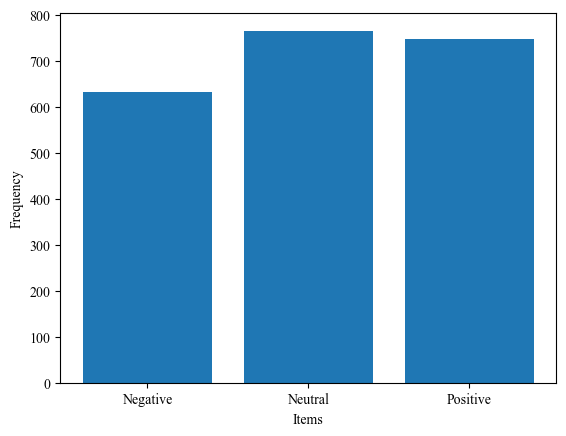

labeler3
1.0    765
2.0    747
0.0    632
Name: count, dtype: int64


In [33]:
import matplotlib.pyplot as plt

counts = combined_df['labeler3'].value_counts()

frequencies = {'Negative': counts[0],
               'Neutral': counts[1],
               'Positive': counts[2]}

# Create bar plot
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']

plt.bar(frequencies.keys(), frequencies.values())

# Add labels and title
plt.xlabel('Items')
plt.ylabel('Frequency')

plt.grid(False)

# Show plot
plt.show()

print(counts)